In [1]:
from spectacle.core.spectra import Spectrum1D
from spectacle.process.lsf import COSLSF
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook
# plt.rcParams["figure.figsize"] = [16, 8]

# Generate a spectrum
Create a mock spectrum with an H$\alpha$ ($\lambda = 1215\;\mathrm{Angstom}$) absorption feature with $f = 0.4164$, $b = 100\; \mathrm{km/s}$, and column density $n = 10^{14.66}\;\mathrm{cm^{-2}}$.

In [3]:
spectrum1 = Spectrum1D()

# Get a listing available pre-defined lines
spectrum1.line_list

   name      wave   osc_str mean_wgt mass_frac    gamma    
           Angstrom                                        
--------- --------- ------- -------- --------- ------------
    H1216 1215.6701  0.4164   1.0079      0.76  626500000.0
      HeI   584.334   2.765   4.0026      0.24  200000000.0
     HeII   303.918  0.4173   4.0026      0.24  627000000.0
  CII1335 1334.5323  0.1278   12.011   0.00307  288000000.0
  CIII977    977.02   0.762   12.011   0.00307 1760000000.0
  CIV1548  1548.195  0.1908   12.011   0.00307  264200000.0
     CV40   40.2678   0.648   12.011   0.00307          0.0
   NIV765   765.148   0.616  14.0067  0.001109          0.0
   NV1239  1238.821   0.157  14.0067  0.001109  339100000.0
    NVI28    28.787   0.675  14.0067  0.001109          0.0
      ...       ...     ...      ...       ...          ...
   MgX609     609.5  0.0838   24.305 0.0006609  200000000.0
 AlII1671  1670.787    1.88   26.982  5.56e-05 1390000000.0
AlIII1855  1854.716   0.539   26.982  5.

<IPython.core.display.Javascript object>


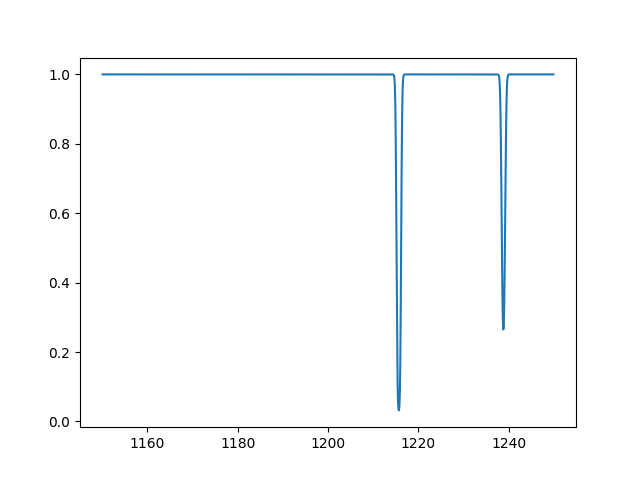

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:67: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)


In [4]:
f, (ax) = plt.subplots()

#Add a line by name
spectrum1.add_line(name="NV1239", v_doppler=1e7, column_density=10**14.66)

# Add line explicitly
spectrum1.add_line(lambda_0=1.21567010E+03, f_value=0.4164, v_doppler=1e7, column_density=10**14.66, gamma=6.2650000e+08)

mask = (spectrum1.dispersion > 1150) & (spectrum1.dispersion < 1250)
ax.plot(spectrum1.dispersion[mask], spectrum1.flux[mask])

## Apply noise to the spectrum

<IPython.core.display.Javascript object>


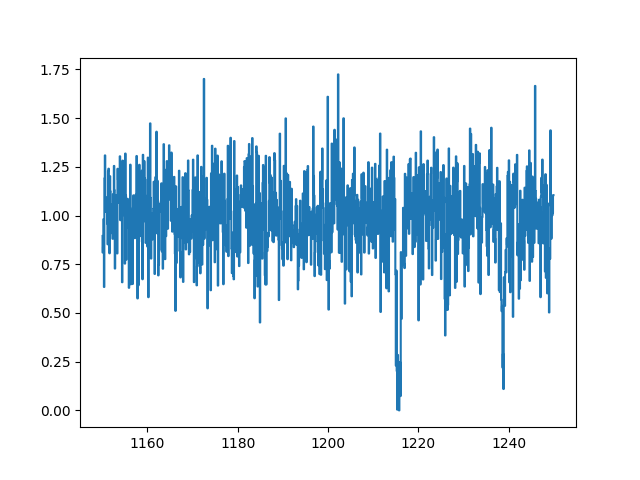

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:67: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)


In [5]:
f, (ax) = plt.subplots()

spectrum1.add_noise()
ax.plot(spectrum1.dispersion[mask], spectrum1.flux[mask], drawstyle='steps')

## Apply the COS LSF

<IPython.core.display.Javascript object>


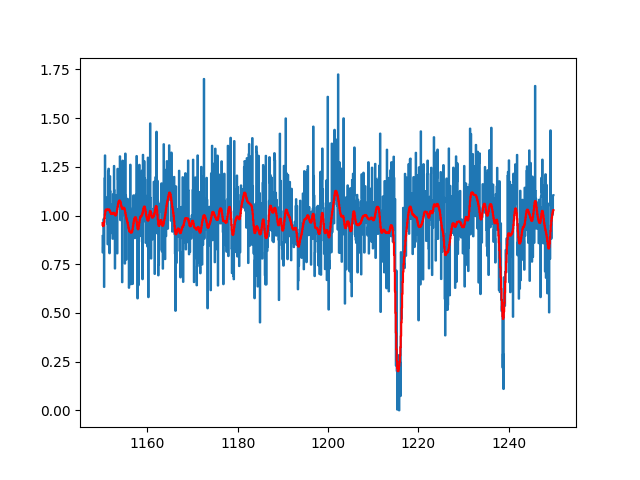

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:67: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)
/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/spectra.py:82: RuntimeWarning: invalid value encountered in log
  tau = np.log(1/flux)


In [6]:
f, (ax) = plt.subplots()

ax.plot(spectrum1.dispersion[mask], spectrum1.flux[mask], drawstyle='steps')

cos_lsf = COSLSF()
spectrum1.add_lsf(cos_lsf)

ax.plot(spectrum1.dispersion[mask], spectrum1.flux[mask], drawstyle='steps', color='r')

In [7]:
# Velocity space

<IPython.core.display.Javascript object>


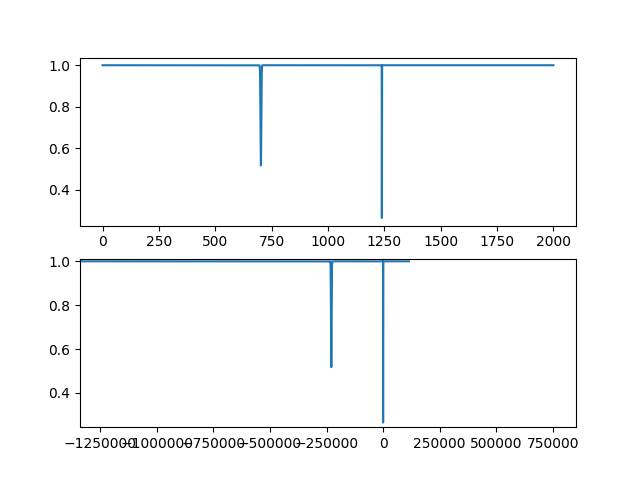

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:67: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)
/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/astropy/units/quantity.py:841: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


In [8]:
spectrum1 = Spectrum1D()
spectrum1.add_line(name="NV1239", v_doppler=1e7, column_density=10**14.66, delta_v=0)
spectrum1.add_line(name="OIII702", v_doppler=1e8, column_density=10**15.66, delta_v=0)

f, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(spectrum1.dispersion, spectrum1.flux)
ax2.plot(spectrum1.velocity(1.23882100E+03), spectrum1.flux)